<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/HistoGAN_Controlling_Colors_of_GAN_Generated_and_Real_Images_via_Color_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HistoGAN: Controlling Colors of GAN-Generated and Real Images via Color Histograms**

논문 링크: https://arxiv.org/abs/2011.11731

지금까지 연구들을 통해(BigGAN, ProGAN, StyleGAN 등) GAN은 고품질 image를 성공적으로 생성할 수 있지만, 제어하기는 어렵다. 따라서 본 논문은 GAN에 의해 생성된 image의 모양을 직관적으로 제어할 수 이는 방법에 대해 연구를 진행하였다.

본 논문에서는 histogram feature를 기반으로 image color를 조작하는 HistoGAN을 제안한다.

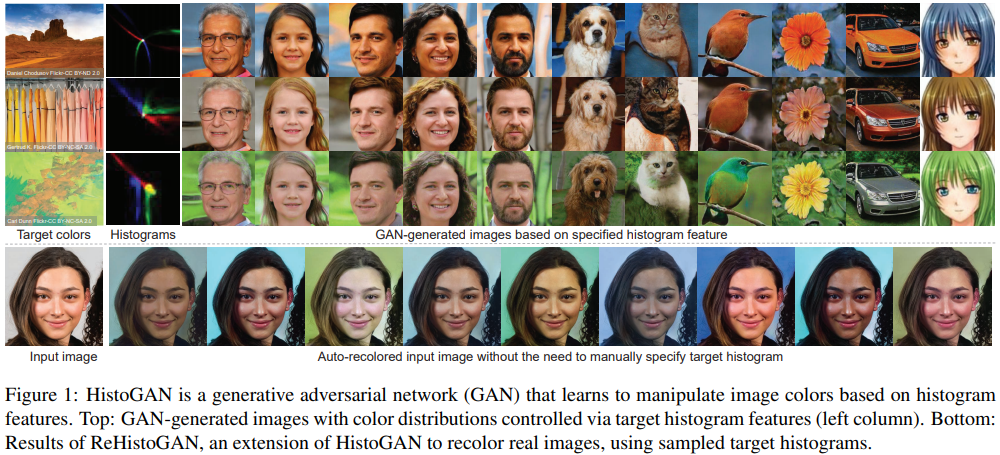

먼저, 위의 그림 Figure 1에서 대상 histogram feature를 통해 생성된 GAN image와 아래에는 HistoGAN의 확장 버전인 ReHistoGAN을 보여준다.

## **HistoGAN 구조**

HistoGAN에 대해 알아보기 전에 histogram feature에 대해 알 필요가 있다.

### **Histogram feature**

HistoGAN에서 사용하는 histogram feature는 색상 불변성 문헌(color constancy literature)에서 차용되었으며, 조명 변화에 대한 불면성이 더 우수하기 때문에 log-chroma space에서 차별화 가능한 histogram으로 구상이 된다. 이 2D histogram은 parameter u_v에 의해 조절이 되며, 3D histogram보다 더욱 간결한 동시에 image의 색상 정보를 전달한다.

그리고 이 Histogram H는 h x h x 3 tensor로 정의가 된다.

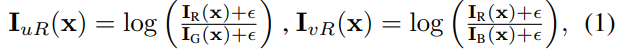

histogram은 주어진 input image I에 대해 먼저 log-chroma space로 변환하여 계산이 되는데, R channel을 기본으로 선택하고 G와 B로 정규화를 진행시 위의 식과 같이 된다.

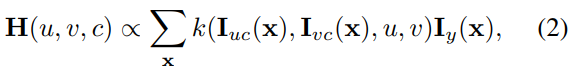

그리고 정규화하지 않은 최종 histogram 식은 위와 같이 된다.

이때, c ∈ {R, G, B} 및 K( )는 미리 정의된 kernel이다. 원래 Gaussian kernel을 사용했지만, inverse-quadratic kernel이 안정성을 크게 증가하여 이를 채택했다.

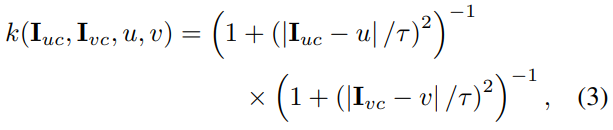

inverse-quadratic kernel의 수식은 위와 같으며, 여기서 τ는 histogram의 부드러움(smoothness)를 제어하는 fall-off parameter이다.

### **Color-controlled Image Generation**

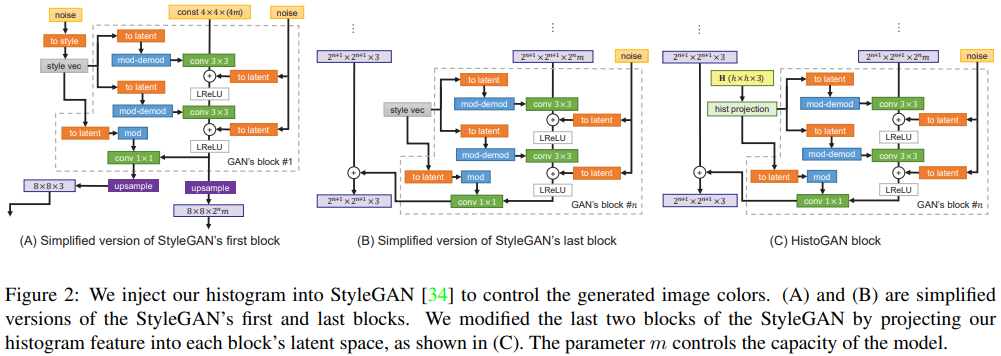

HistoGAN은 StyleGAN을 모티브로 만들어졌다. 특히 원래 StyleGAN의 디자인인 위의 그림 FIgure 2의 (A)와 (B)를 수정하여 histogram feature를 output image의 progressive construction에 주입(inject)할 수 있도록 하였다.

그리고 (B) 부분의 StyleGAN 마지막 두 블록을 histogram feature로 대체하여 수정했다.

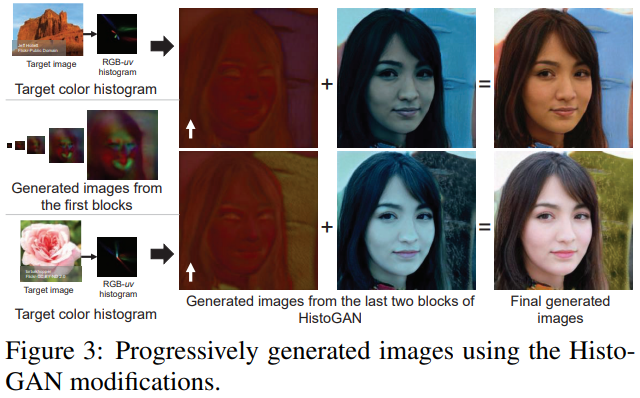

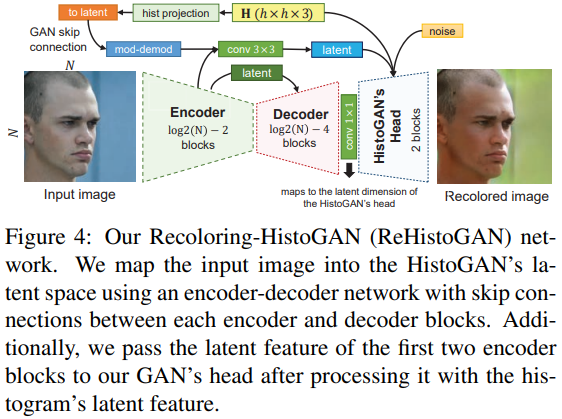